In [1]:
import logging

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core.dataset import Dataset
from azureml.train.automl import AutoMLConfig
from azureml.train.automl import utilities

In [2]:
# import os
# os.environ['NUMEXPR_MAX_THREADS'] = '32'

In [3]:
subscription_id = 'ab5d067c-dd35-478e-b198-570174e0b8b3'
resource_group = 'rg-cschick'
workspace_name = 'mlw-cschick'

workspace = Workspace(subscription_id, resource_group, workspace_name)

experiment_name = "rails-automl"
experiment = Experiment(workspace, experiment_name)

In [4]:
dataset = Dataset.get_by_name(workspace, name='KIRACLRA')
# dataset.to_pandas_dataframe()

training_data, validation_data = dataset.random_split(percentage=0.8, seed=223)
label_column_name = "Species"
positive_label = 'CLRA'

In [5]:
automl_settings = {
    "n_cross_validations": 5,
    "primary_metric": "accuracy",
    "iteration_timeout_minutes": 30,
    "experiment_timeout_hours": 1,
    "max_cores_per_iteration": -1,
    "enable_early_stopping": False,
    "verbosity": logging.INFO,
    "enable_stack_ensemble": False,
}

automl_config = AutoMLConfig(
    task="classification",
    debug_log="automl_errors.log",
    training_data=training_data,
    label_column_name=label_column_name,
    positive_label = positive_label,
    **automl_settings,
)

In [6]:
utilities.get_primary_metrics("classification")


['AUC_weighted',
 'precision_score_weighted',
 'average_precision_score_weighted',
 'accuracy',
 'norm_macro_recall']

In [7]:
local_run = experiment.submit(automl_config, show_output=True)

No run_configuration provided, running on local with default configuration
Running in the active local environment.


2022-02-14:18:24:14,184 INFO     [modeling_bert.py:226] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
2022-02-14:18:24:14,189 INFO     [modeling_xlnet.py:339] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
2022-02-14:18:24:18,457 INFO     [utils.py:159] NumExpr defaulting to 4 threads.


Experiment,Id,Type,Status,Details Page,Docs Page
rails-automl,AutoML_7555dda6-8cf1-4b25-a7e9-f78154387a2d,automl,Preparing,Link to Azure Machine Learning studio,Link to Documentation


Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

********************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

********************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected i

2022-02-14:19:32:38,223 INFO     [explanation_client.py:334] Using default datastore for uploads


In [8]:
local_run

Experiment,Id,Type,Status,Details Page,Docs Page
rails-automl,AutoML_7555dda6-8cf1-4b25-a7e9-f78154387a2d,automl,Completed,Link to Azure Machine Learning studio,Link to Documentation


In [9]:
best_run, best_model = local_run.get_output()
best_model

PipelineWithYTransformations(Pipeline={'memory': None,
                                       'steps': [('datatransformer',
                                                  DataTransformer(enable_dnn=False, enable_feature_sweeping=True, feature_sweeping_config={}, feature_sweeping_timeout=86400, featurization_config=None, force_text_dnn=False, is_cross_validation=True, is_onnx_compatible=False, observer=None, task='classification', working_dir='/mn...
), random_state=None, reg_alpha=0.3684210526315789, reg_lambda=0.3684210526315789, subsample=0.7921052631578948))], verbose=False))], flatten_transform=None, weights=[0.2727272727272727, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]))],
                                       'verbose': False},
                             y_transformer={},
                             y_transformer_name='LabelEncoder')

In [10]:
# convert the test data to dataframe
X_test_df = validation_data.drop_columns(
    columns=[label_column_name]
).to_pandas_dataframe()
y_test_df = validation_data.keep_columns(
    columns=[label_column_name], validate=True
).to_pandas_dataframe()

In [11]:
# call the predict functions on the model
y_pred = best_model.predict(X_test_df)
y_pred

array(['CLRA', 'KIRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA',
       'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA',
       'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA',
       'CLRA', 'KIRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'KIRA',
       'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA', 'KIRA',
       'KIRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'KIRA',
       'KIRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA',
       'KIRA', 'CLRA', 'KIRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA',
       'CLRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA', 'KIRA',
       'CLRA', 'CLRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA',
       'CLRA', 'CLRA', 'CLRA', 'KIRA', 'CLRA', 'CLRA', 'CLRA', 'CLRA',
       'CLRA', 'CLRA', 'KIRA', 'CLRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA',
       'KIRA', 'CLRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA',
       'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA', 'KIRA',
      

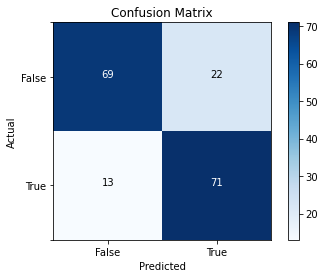

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

cf = confusion_matrix(y_test_df.values, y_pred)
plt.imshow(cf, cmap=plt.cm.Blues, interpolation="nearest")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
class_labels = ["False", "True"]
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks([-0.5, 0, 1, 1.5], ["", "False", "True", ""])
# plotting text value inside cells
thresh = cf.max() / 2.0
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(
        j,
        i,
        format(cf[i, j], "d"),
        horizontalalignment="center",
        color="white" if cf[i, j] > thresh else "black",
    )
plt.show()